# Number of EMS Dispatches in Pittsburgh
## By: Gavin Zheng
### Dataset: [911 EMS Dispatches](https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire/resource/ff33ca18-2e0c-4cb5-bdcd-60a5dc3c0418)

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("ems-calls.csv")
df.head()

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,1,000015F42010D7E9BFD0478A34A274,EMS,E4,EMS Basic Life Support Assistance response (i....,Q2,2019,FALL,WBG,WILKINSBURG,4.200356e+11,-79.865320,40.450306
1,2,0000B80868F29646B49B6BBEACF327,EMS,E3,EMS Standard Basic Life Support response,Q2,2017,BACK PAIN,PGH,PITTSBURGH,4.200356e+11,-80.058297,40.458065
2,3,000144D3D698BD201ADA401DB80C22,EMS,E5,All administrative mark outs,Q2,2019,NON EMERGENCY TRANSPORT,PGH,PITTSBURGH,4.200322e+11,-80.005155,40.457261
3,4,00027A35111A3580959D7A51E11A6B,EMS,E3,EMS Standard Basic Life Support response,Q4,2018,TRAUMA,PGH,PITTSBURGH,4.200313e+11,-79.891090,40.457802
4,5,0002E6494A455866F44A1ECE8426D7,EMS,E2,EMS Standard Advanced Life Support response,Q4,2016,PSYCH,WBG,WILKINSBURG,4.200356e+11,-79.865320,40.450306


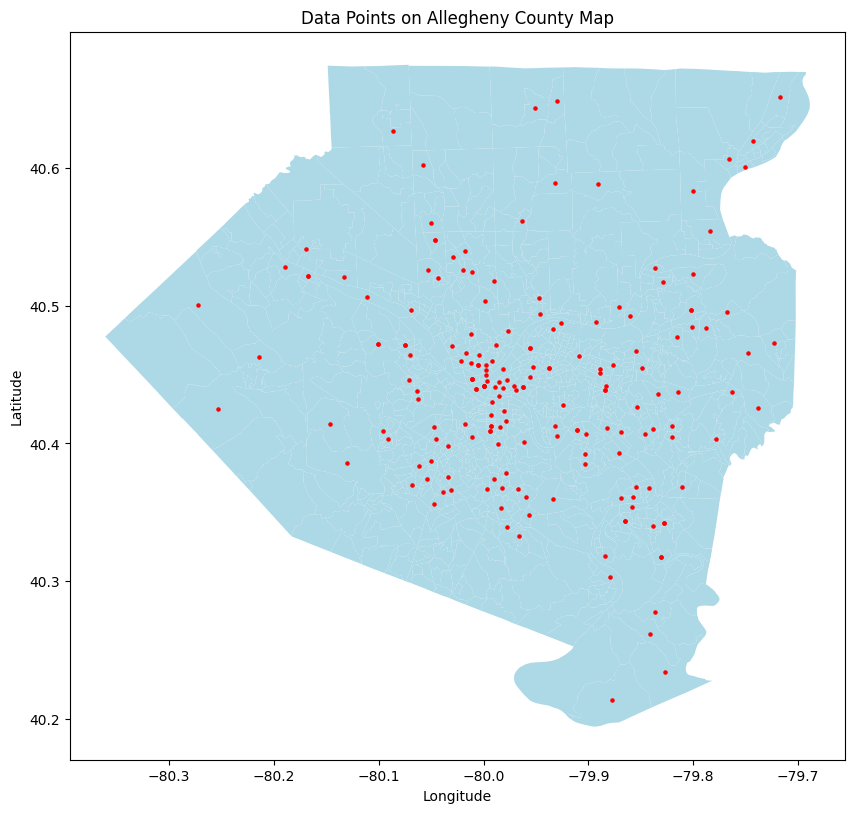

In [16]:
import geopandas as gpd

allegheny_gdf = gpd.read_file("Allegheny_County_Census_Block_Groups_2016.shp")

import pandas as pd
from shapely.geometry import Point

# Load data
data_path = 'ems-calls.csv'
df = pd.read_csv(data_path)
sampled_df = df.sample(frac=0.0001, random_state=1)  
# Create GeoDataFrame from DataFrame
sampled_df['geometry'] = sampled_df.apply(lambda row: Point(float(row['census_block_group_center__x']), float(row['census_block_group_center__y'])), axis=1)
points_gdf = gpd.GeoDataFrame(sampled_df, geometry='geometry')

# Set the same CRS for points as the shapefile to ensure they align correctly
points_gdf.set_crs(allegheny_gdf.crs, inplace=True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
allegheny_gdf.plot(ax=ax, color='lightblue')  # Plot the Allegheny County shapefile as base
points_gdf.plot(ax=ax, marker='o', color='red', markersize=5)  # Plot your data points on top

plt.title('Data Points on Allegheny County Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


![](Map_of_Allegheny_County,_Pennsylvania.png)

![](allegheny-county-pennsylvania-zip-codes-map-1.png)

## Metric: EMS Dispatches
### Process/Observations/Conclusions

Another one of our metrics was seeing where a majority of EMS calls came from and wherever that maybe, that will be the most dangerous location. As I did the analysis on this data, however, I realized that there were 1.8 million data points and it was not feasible to plot every single one of them so I just did a sample of the data. From the shapefile graph, we can see that most calls are centralzied around Pittsburgh/Mount Oliver area. While it is not quite an exact telling, it gives us a general overview of where these calls come from. 

In future analysis, I will hope to only count the emergency calls and refine the location of the data provided. I have also included a map of Pittsburgh zip codes in case that extra specifics need to be reached. But in the end, I came to the conclusion that Mount Oliver, is the county that recieves the most calls. 